**Disclaimer**: All of information and most of the code in this Notebook is taken or derived from https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier

Libraries for plotting the results

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

MLP trains on two arrays: array X of size (n_samples, n_features), which holds the training samples represented as floating point feature vectors; and array y of size (n_samples,), which holds the target values (class labels) for the training samples:

In [ ]:
X = ((0., 0.), (1., 1.))
testX = ((2., 2.), (-1., -2.))

Further, the model supports [multi-label classification](https://scikit-learn.org/stable/modules/multiclass.html#multiclass) in which a sample can belong to more than one class. 

In [ ]:
multipleLabels = False

In [ ]:
if not(multipleLabels):
    y = (0, 1)
    hidden_layer_sizes = (5, 2)
else:
    y = ((0, 1), (1, 1))
    hidden_layer_sizes = (15,)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, \
                    hidden_layer_sizes=hidden_layer_sizes, \
                    random_state=1)
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

After fitting (training), the model can predict labels for new samples:

In [ ]:
test_y = clf.predict(testX)

`coefs_` is a list of weight matrices, where weight matrix at index `i` represents the weights between layer `i` and layer `i + 1`. 

In [ ]:
clf.coefs_

[array([[-0.14196276, -0.02104562, -0.85522848, -3.51355396, -0.60434709],
        [-0.69744683, -0.9347486 , -0.26422217, -3.35199017,  0.06640954]]),
 array([[ 0.29164405, -0.14147894],
        [ 2.39665167, -0.6152434 ],
        [-0.51650256,  0.51452834],
        [ 4.0186541 , -0.31920293],
        [ 0.32903482,  0.64394475]]),
 array([[-4.53025854],
        [-0.86285329]])]

In [ ]:
tuple([coef.shape for coef in clf.coefs_])

((2, 5), (5, 2), (2, 1))

Attempting to apply each layer with a ReLU activation function.

In [ ]:
def ReLU(x):
    return max(0, x)

In [ ]:
predictions = [X, testX]
activate = np.vectorize(ReLU)
for idx, prediction in enumerate(predictions):
    predictions[idx] = np.array(predictions[idx])
    for coef in (clf.coefs_):
        #print(predictions[idx])
        # apply the activation function
        predictions[idx] = activate(predictions[idx])
        #print(predictions[idx])
        # multiply by the weights
        predictions[idx] = np.dot(predictions[idx], coef)
        #print(predictions[idx])
print(predictions)


[array([[0.],
       [0.]]), array([[0.],
       [0.]])]


In [ ]:
clf.predict_proba(testX)

array([[1.96718015e-004, 9.99803282e-001],
       [1.00000000e+000, 4.67017947e-144]])

## Plotting

In [ ]:
figure = plt.figure(figsize=(1, 1))

<Figure size 72x72 with 0 Axes>

In [ ]:
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

In [ ]:
h = 0.02  # step size in the mesh
pad = 0.5
ixcoords = 0
iycoords = 1

In [ ]:
# Prepare the points
npX = np.array(X)

In [ ]:
# and testing points
np_testX = np.array(testX)
npXcat = np.concatenate((npX, np_testX))

In [ ]:
# the limits to the graph and its mesh grid
x_min, x_max = npXcat[:, ixcoords].min() - pad, npXcat[:, ixcoords].max() + pad
y_min, y_max = npXcat[:, iycoords].min() - pad, npXcat[:, iycoords].max() + pad
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] x [y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)

[[0. 0.]
 [1. 1.]]
(0, 1)
[1 0]


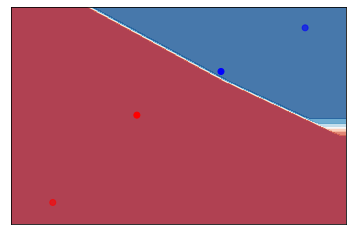

In [ ]:
ax = plt.subplot(1, 1, 1)
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
print(npX)
print(y)
print(test_y)
ax.scatter(npX[:, 0], npX[:, 1], c=y, cmap=cm_bright)
ax.scatter(np_testX[:, 0], np_testX[:, 1], c=test_y, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
figure.subplots_adjust(left=0.02, right=0.98)
plt.show()